In [61]:
import numpy as np
import sklearn
import skimage
import cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import os


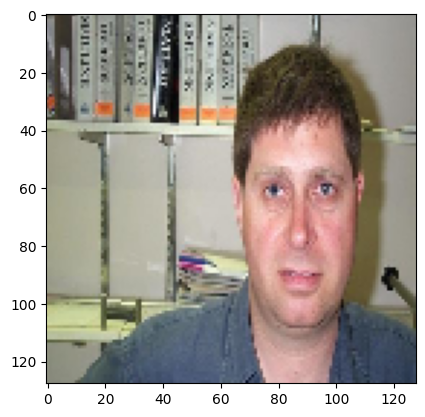

In [62]:
!pip freeze > requirements.txt
path_base = "./Faces/"

nb_faces = 435

images = np.empty((nb_faces,), dtype = object)

target_size = (128, 128)

for i in range(nb_faces):
    filename = f"image_{str(i+1).zfill(4)}.jpg"
    image = ski.io.imread(path_base+filename)
    images[i] = cv2.resize(image,target_size)
    

plt.imshow(images[0], cmap = 'gray')

# 📊 Histogramme de gradient orienté 📈

Une présentation d'Alix ANNERAUD, Capucine GARREAU, Aliénor TRANOUEZ et Zya PEUDEVIN.

# 🚀 Introduction 

Le **traitement d'images** est un domaine essentiel en informatique.

Ses objectifs : 
-  analyser
-  interpréter
-  transformer 

La **détection de caractéristiques** est étape cruciale pour extraire des informations pertinentes.

Permet : 
-  la reconnaissance d'objets 
-  la détection de mouvements
-  analyse de scènes

**Histogrammes de gradients orientés (HOG)** est une des méthodes les plus populaires pour **détecter** et **représenter** des caractéristiques dans les images.

## Sommaire

1. 🏺 Histoire
2. 📚 Fondements théoriques
3. 🛠️ Applications
4. 🔍 Étude de cas
5. 📊 Analyse

# 2. 🏺 Histoire

## Contexte

Avant HOG on utilisait des transformées de Fourier, des contours de Canny ou encore des histogrammes de gradients

Mais on a besoin d'un descripteur plus **robuste** -> HOG en **2005** avec l'article: "Histograms of Oriented Gradients for Human Detection"

L'idée derrière le HOG est que la forme et la texture des objets sont capturées par la distribution des gradients locaux. Cette même idée est apparue dans un brevet de **Robert K. McConnel en 1986**: "Method and Apparatus for Partern Recognition"


## Avancées

Le HOG peut améliorer la **détéction d'objets dans des environnements variés.**

Il offre particulièrement une **précision accrue** sur la **détéction de piétons** par rapport aux méthodes précédentes.

Les domaines de son utilisation sont la **sécurité**, la **surveillance** et les **véhicules autonomes**.

## Adoption et évolution

HOG est devenue un **standard** parmis les descripteurs d'images.

Pour preuve il est même intégré à **OpenCV**.

C'est un outil **traditionnel** prisé car **rapide et moins gourmand en ressource**.

## Impacte et Contributions du HOG

HOG est un **précurseur** de nombreuses techniques de **détections d'objets**.

Il a **contribué** à l'amélioration des algorithmes de **vision par ordinateur**.

Il est populaire encore aujourd'hui par sa **robustesse** et son **efficacité**.

# 3. 📚 Théorie

Nous allons maintenant vous présenter la théorie derrière l'Histogramme de gradient orienté.

## ✂️ Découpage

- Découpage en cellule

- Regroupement des cellules en blocs

- Normalisation des blocs

## 📐 Calcul des gradients

Dans une cellule, on calcule les gradients : 

$$
G =
\begin{cases}
    I(x+1, y) - I(x-1, y) \\
    I(x, y+1) - I(x, y-1)  
\end{cases}
$$

où $I$ est l'intensité du pixel en $(x, y)$.


On transforme ce gradient en coordonnées polaires :

$$
M = \sqrt{G_x^2 + G_y^2}
$$
$$
\theta = \arctan\left(\frac{G_y}{G_x}\right)
$$

On a donc un vecteur gradient $(M, \theta)$ pour chaque pixel.

## ⚖️ Normalisation

Les histogrammes de chaques blocs sont normalisés:

$$
v = \frac{v}{\sqrt{\|v\|^2 + \epsilon^2}}
$$

Où : 
- $v$ est le vecteur de l'histogramme
- $\epsilon$ est un paramètre de normalisation

# 4. 🛠️ Applications

# 5. 🔍 Etude de cas

## Exemple d'un HOG

In [63]:
image = data.astronaut()

fd, hog_image = hog(
    image,
    orientations=8,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

In [64]:
%%capture out

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

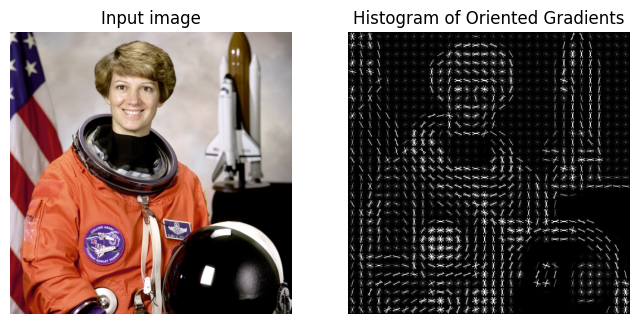

In [65]:
out()

### II/ Construction des fonctions 

#### A) Chargement des données et labellisation 

####  1. Pour le jeu de données https://www.kaggle.com/datasets/imbikramsaha/caltech-101

In [ ]:
def charger_images(path_base, number_images, target_size=(128, 192), reshape = True):

    """ Chargement des données provenant d'un même dossier, étant nommées dans le format "image_0XXX """

    # On construit un array vide qui contiendra les images 
    images = np.empty((number_images,), dtype=object)
    # Puis un array d'indices qui donnera un identifiant unique à chaque image
    indexes = np.arange(number_images)

    # Chargement des images
    for i in range(number_images):
        
        filename = f"image_{str(i+1).zfill(4)}.jpg"
        image = ski.io.imread(path_base + filename)

        if reshape :
            
            #Chaque image est redimensionnée de sorte que ses 2 dimensions soient des multples de 8
            image = cv2.resize(image, target_size)

        images[i] = image

    return images, indexes

In [67]:
def labelize_people(number_images) : 

    """ On labellise à la main les images : chaque personne différente a sa propre classe. """

    labels = np.zeros((number_images,1), dtype=int)

    labels[0:22] = 0
    labels[22:41] = 1
    labels[41:46] = 2
    labels[46:68] = 3
    labels[68:89] = 4
    labels[89:112] = 5
    labels[112:132] = 6
    labels[132:137] = 7
    labels[137:158] = 8
    labels[158:163] = 9
    labels[163:168] = 10
    labels[168:173] = 11
    labels[173:193] = 12
    labels[193:214] = 13
    labels[214:239] = 14
    labels[239:261] = 15
    labels[261:266] = 16
    labels[266:285] = 17
    labels[285:305] = 18
    labels[305:325] = 19
    labels[325:345] = 20
    labels[345:365] = 21
    labels[365:387] = 22
    labels[387] = 23
    labels[388] = 24 
    labels[389] = 25
    labels[390] = 26
    labels[391] =  27
    labels[392:397] = 28
    labels[397:417] = 29
    labels[417:number_images] = 30

    return labels

In [68]:
def labelize_men_woman(number_images):  

    """" On labellise à la main les images : 0 pour un homme et 1 pour une femme. """
    
    labels = np.zeros((number_images, 1), dtype=int)

    labels[0:22] = 0
    labels[22:41] = 0  
    labels[41:46] = 0
    labels[46:68] = 0
    labels[68:89] = 1
    labels[89:112] = 0
    labels[112:132] = 1
    labels[132:137] = 0
    labels[137:158] = 0
    labels[158:163] = 0
    labels[163:168] = 1
    labels[168:173] = 1
    labels[173:193] = 1
    labels[193:214] = 0
    labels[214:239] = 0
    labels[239:261] = 0
    labels[261:266] = 0
    labels[266:285] = 1
    labels[285:305] = 0
    labels[305:325] = 0
    labels[325:345] = 1
    labels[345:365] = 1
    labels[365:387] = 0
    labels[387] = 1
    labels[388] = 0
    labels[389] = 0
    labels[390] = 0
    labels[391] = 0
    labels[392:397] = 0
    labels[397:417] = 1
    labels[417:435] = 1

    return labels

####  2. Pour le jeu de données http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1

Sur ce jeu de donnnées,on v=convertit les images en noir et blanc, car la reconnaissance d'objets en embarqué nécessité une simplification de l'information. Par exemple, une image en noir et blanc sera 3 fois moins lourde en mémoire qu'une image Rouge, Bleu, Vert, car elle ne dispose que d'un canal.

In [69]:
def load_dataset_from_folders(base_path, target_size=(128, 192), to_gray=True, reshape = True):

    """ Chargement des données provenant d'un dossier contenant lui-même des sous-dossiers. 
        Chaque sous-dossier correspond à une classe d'image.
    """

    images = []
    labels = []
    indexes = []
    label_map = {}
    current_index = 0

    for label_index, folder_name in enumerate(sorted(os.listdir(base_path))):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            label_map[label_index] = folder_name
            for filename in sorted(os.listdir(folder_path)):
                image_path = os.path.join(folder_path, filename)
                image = ski.io.imread(image_path)
                
                # Conversion en niveaux de gris avec un seul canal
                if to_gray:
                    if len(image.shape) == 3:  # Si l'image est en couleur (RGB)
                        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Conversion en niveau de gris
                    # Si l'image est déjà en niveau de gris (1 canal), aucune conversion n'est effectuée
                    # On force l'image à avoir une seule dimension de canal (2D)
                    image = np.squeeze(image)  # On retire toute dimension supplémentaire

                if reshape : 
                    #Chaque image est redimensionnée de sorte que ses 2 dimensions soient des multples de 8
                    image_resized = cv2.resize(image, target_size)  
                    images.append(image_resized)

                else : 
                    images.append(image)

                labels.append(label_index)
                indexes.append(current_index)
                current_index += 1

    images = np.array(images, dtype=object)  
    labels = np.array(labels, dtype=int)    
    indexes = np.array(indexes, dtype=int)

    return images, labels, indexes, label_map

#### B) HOG

In [70]:
def HOG(images, nb_images, orientations=8, pixels_per_cell=(4, 4), cells_per_block=(1, 1), visualize=True):
  
    from skimage.feature import hog

    hog_images = np.empty((nb_images,), dtype=object)
    hog_images_vector = np.empty((nb_images,), dtype=object)
    
    for i in range(nb_images):
    
        image = images[i]
    
        
        if len(image.shape) == 3:
            if image.shape[2] == 3:  
                image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            elif image.shape[2] == 4: 
                image = cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)
            elif image.shape[2] == 1:  
                image = image[:, :, 0]
        
        if image.dtype != np.float64:
            image = image.astype(np.float64)
            if image.max() > 1.0:
                image /= 255.0
                
            # On calcule l'image HOG ainsi que le vecteur de caractéristiques
            feature_vector, hog_image = hog(
                image,
                orientations=orientations, # Nombre d'orientations possibles
                pixels_per_cell=pixels_per_cell, # Nombre de pixels par cellule
                cells_per_block=cells_per_block, # Nombre de cellules par bloc d'orientation
                visualize=visualize,  # Obtenir une version visualisable des images HOG
                feature_vector=True,  # Obtenir le vecteur caractéristique
                transform_sqrt=True   # Appliquer une correction gamma
            )
            
            hog_images[i] = hog_image
            hog_images_vector[i] = feature_vector  
    
    features_array = np.array([vector for vector in hog_images_vector])
    
    return hog_images, features_array

#### C) Prétraitement : normalisation par le maximum et séparation des données

In [71]:
def data_split(X, Y, indexes, train_size=0.8, test_size=0.1):

    """On divise le jeu de données en ensembles d'apprentissage, de validation et de test"""
    
    from sklearn.model_selection import train_test_split
    
    val_size = 1 - train_size - test_size
    X_train, X_test, Y_train, Y_test, indexes_train, indexes_test = train_test_split(
        X, Y, indexes, test_size=test_size, stratify=Y, shuffle=True
    )
    train_size = train_size / (1 - test_size) # On divise par 1 - test_size pour qu'au total train_size + val_size = 1
    val_size = val_size / (1 - test_size)
    X_train, X_val, Y_train, Y_val, indexes_train, indexes_val = train_test_split(
        X_train, Y_train, indexes_train, test_size=val_size, stratify=Y_train, shuffle=True
    )

    # L'option shuffle mélange les données pour ne pas que le modèle puisse apprendre de l'ordre  des données
    # L'option stratify  sélectionne une quantité équivalente de données de mêmes classes pour qu'elles soient représentées 
    # dans tous les jeux de données.

    return X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test

In [72]:
def data_normalization(X_train, X_val, X_test):

    """ On normalise l'ensemble des datasets par la valeur maximale de l'ensemble d'apprentissage """

    X_train_max = np.max(X_train)
    X_train_normalized = np.array(X_train / X_train_max, dtype=np.float64)
    X_val_normalized = np.array(X_val / X_train_max, dtype=np.float64)
    X_test_normalized = np.array(X_test / X_train_max, dtype=np.float64)

    return X_train_normalized, X_val_normalized, X_test_normalized, X_train_max

In [73]:
def data_preprocessing(X, Y, indexes, number_images, target_size_image=(128, 192), train_size=0.8, test_size=0.1):

    """ Fonction qui regroupe les étapes de preprocessing """
    
    X = X.reshape(number_images, -1)
    Y = Y.reshape(number_images,)
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test = data_split(
        X, Y, indexes, train_size=0.8, test_size=0.1
    )
    X_train, X_val, X_test, X_train_max = data_normalization(X_train, X_val, X_test)

    return X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max

#### D) Kernel de notre SVM : la distance de Hellinger

La distance de Hellinger entre deux vecteurs de probabilités \( p \) et \( q \) est définie par :

$$
H(p, q) = \sqrt{\frac{1}{2} \sum_{i} \left( \sqrt{p_i} - \sqrt{q_i} \right)^2}
$$

##### Transformation en kernel

Pour utiliser cette distance comme un kernel dans un SVM, on peut la transformer en une mesure de similarité, par exemple avec une exponentielle négative :

$$
K(p, q) = \exp(-\gamma \cdot H(p, q)^2)
$$

où :


- $\gamma$  est un paramètre positif qui contrôle l'impact de la distance sur la similarité.


In [74]:
def hellinger_distance(p, q):
    p = np.array(p)
    q = np.array(q)
    return np.sqrt(0.5 * np.sum((np.sqrt(p) - np.sqrt(q))**2))

def hellinger_kernel(X, Y=None, gamma=1.0):
    if Y is None:
        Y = X
    dists = np.array([[hellinger_distance(x, y) for y in Y] for x in X])
    return np.exp(-gamma * (dists**2))

#### E) Validation croisée

In [75]:
def plot_crossvalidation(val_err_rate, vect_gamma, vect_c) :

    """ Permet d'afficher la matrice de confusion de la validation croisée des hyperparamètres C et Gamma. """

    plt.figure(figsize=(10, 8))
    plt.imshow(
        val_err_rate,
        extent=[np.log10(vect_gamma.min()), np.log10(vect_gamma.max()), np.log10(vect_c.min()), np.log10(vect_c.max())],
        aspect="auto",
        origin="lower",
        cmap="viridis"
    )
    
    plt.colorbar(label="Validation Error Rate")
    plt.xlabel("Log(Gamma)")
    plt.ylabel("Log(C)")
    plt.xticks(np.log10(vect_gamma), labels=[f"{g:.2e}" for g in vect_gamma], rotation=45)
    plt.yticks(np.log10(vect_c), labels=[f"{c:.2e}" for c in vect_c])
    plt.title("Validation Error Rate across C and Gamma")
    plt.show()

def crossvalidation(X_train, X_val, Y_train, Y_val, vect_c=np.logspace(0, 4, 10), vect_gamma=np.logspace(-5, -1, 10)):

    """ Parcours d'une liste de valeurs de Gamma et C possibles afin de trouver le couple d'hyperparamètres 
        minimisant l'erreur. """

    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    print("crossvalidation")
    svm = SVC(kernel="precomputed")
    val_err_rate = np.empty((vect_c.shape[0], vect_gamma.shape[0]))
    for ind_gamma, gamma in enumerate(vect_gamma):
        K_train = hellinger_kernel(X_train, X_train, gamma)
        K_val = hellinger_kernel(X_val, X_train, gamma)
        for ind_c, c in enumerate(vect_c):
            svm.C = c
            svm.fit(K_train, Y_train)
            val_err_rate[ind_c][ind_gamma] = 1 - accuracy_score(Y_val, svm.predict(K_val))

    # On recherche le couple minimisant l'erreur de validation 
    min_index = np.unravel_index(val_err_rate.argmin(), val_err_rate.shape)
    c_optimal= vect_c[min_index[0]]
    gamma_optimal= vect_gamma[min_index[1]]

    # On affiche la matrice de confusion de Gamma et de C
    plot_crossvalidation(val_err_rate, vect_gamma, vect_c)  

    # On retourne les paramètres optimaux
    return gamma_optimal, c_optimal


In [76]:
def crossvalidation(X_train, X_val, Y_train, Y_val, vect_c=np.logspace(0, 4, 10), vect_gamma=np.logspace(-5, -1, 10)):

    """ Parcours d'une liste de valeurs de Gamma et C possibles afin de trouver le couple d'hyperparamètres 
        minimisant l'erreur. """

    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    svm = SVC(kernel="precomputed")
    val_err_rate = np.empty((vect_c.shape[0], vect_gamma.shape[0]))
    for ind_gamma, gamma in enumerate(vect_gamma):
        K_train = hellinger_kernel(X_train, X_train, gamma)
        K_val = hellinger_kernel(X_val, X_train, gamma)
        for ind_c, c in enumerate(vect_c):
            svm.C = c
            svm.fit(K_train, Y_train)
            val_err_rate[ind_c][ind_gamma] = 1 - accuracy_score(Y_val, svm.predict(K_val))

    # On recherche le couple minimisant l'erreur de validation 
    min_index = np.unravel_index(val_err_rate.argmin(), val_err_rate.shape)
    c_optimal= vect_c[min_index[0]]
    gamma_optimal= vect_gamma[min_index[1]]

    # On affiche la matrice de confusion de Gamma et de C
    plot_crossvalidation(val_err_rate, vect_gamma, vect_c)  

    # On retourne les paramètres optimaux
    return gamma_optimal, c_optimal

#### F) Apprentissage des paramètres optimaux et affichage des résultats

In [77]:
def learn_optimal_parameters(X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal):
    
    """ On apprend les hyperparamètres qui ont donné l'erreur d'apprentissage la plus basse. """

    from sklearn.metrics import accuracy_score

    svm = SVC(kernel="precomputed", C=c_optimal)
    K_train = hellinger_kernel(X_train, X_train, gamma_optimal)
    K_val = hellinger_kernel(X_val, X_train, gamma_optimal)
    K_test = hellinger_kernel(X_test, X_train, gamma_optimal)
    svm.fit(K_train, Y_train)
    results_train, results_val, results_test = predict_with_indexes(svm, K_train, K_val, K_test, indexes_train, indexes_val, indexes_test)
    err_val = 1 - accuracy_score(Y_val, results_val[:, 1])
    err_test = 1 - accuracy_score(Y_test, results_test[:, 1])

    return results_train, results_val, results_test, err_val, err_test

In [78]:
def predict_with_indexes(svm, X_train, X_val, X_test, indexes_train, indexes_val, indexes_test):

    """ Concaténation des prédiction avec leur indice d'origine, permettant d'observer si une donnée 
        particulière a bien été classifiée. """

    # Prédictions pour chacun des ensembles de données 
    Y_train_pred = svm.predict(X_train)
    Y_val_pred = svm.predict(X_val)
    Y_test_pred = svm.predict(X_test)


    # Concaténation des classes prédîtes avec leur indice 
    results_train = np.vstack((indexes_train, Y_train_pred)).T
    results_val = np.vstack((indexes_val, Y_val_pred)).T
    results_test = np.vstack((indexes_test, Y_test_pred)).T

    return results_train, results_val, results_test

In [79]:
def plot_crossvalidation(val_err_rate, vect_gamma, vect_c):
    """
    Affiche la matrice de confusion de la validation croisée des hyperparamètres C et Gamma
    et met en évidence la zone d'optimalité.
    """

    # Recherche des indices de l'erreur minimale
    min_index = np.unravel_index(val_err_rate.argmin(), val_err_rate.shape)
    optimal_c = vect_c[min_index[0]]
    optimal_gamma = vect_gamma[min_index[1]]

    plt.figure(figsize=(10, 8))
    plt.imshow(
        val_err_rate,
        extent=[np.log10(vect_gamma.min()), np.log10(vect_gamma.max()), np.log10(vect_c.min()), np.log10(vect_c.max())],
        aspect="auto",
        origin="lower",
        cmap="viridis"
    )
    plt.colorbar(label="Validation Error Rate")
    plt.xlabel("Log(Gamma)")
    plt.ylabel("Log(C)")

    # Ajouter des ticks pour les valeurs log
    plt.xticks(
        np.log10(vect_gamma),
        labels=[f"{g:.2e}" for g in vect_gamma],
        rotation=45
    )
    plt.yticks(
        np.log10(vect_c),
        labels=[f"{c:.2e}" for c in vect_c]
    )

    # Titre du graphique
    plt.title("Validation Error Rate across C and Gamma")

    # Ajouter un marqueur pour le point optimal
    plt.scatter(
        np.log10(optimal_gamma), 
        np.log10(optimal_c),
        color="red",
        label=f"Optimal (C={optimal_c:.2e}, Gamma={optimal_gamma:.2e})",
        edgecolors="white",
        s=100
    )

    # Ajouter une légende
    plt.legend(loc="upper right")

    # Afficher la figure
    plt.show()

### III/ Présentation des jeux de données

#### Fonction auxiliaire d'affichages d'images

In [80]:
def plot_random_images(images, num_images=6):
    """
    Sélectionne aléatoirement des images depuis un tableau et les affiche.
    """

    import random
    
    # On choisit aléatoirement des indices parmi [0, nb_images - 1]
    random_indices = random.sample(range(len(images)), num_images)
    
    # On sélectionne les images correspondantes
    selected_images = [images[idx] for idx in random_indices]

    #Créer une grille de 3x2 pour afficher les images
    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    axes = axes.flatten()  # Convertir en liste plate pour itérer facilement
    
    for ax, image in zip(axes, selected_images):
        ax.imshow(image)
        ax.axis('off')  # Supprimer les axes
    
    # Supprimer les axes inutilisés s'il y a moins d'images que de cases
    for ax in axes[num_images:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


####   A) Jeu de données de visage de face : https://www.kaggle.com/datasets/imbikramsaha/caltech-101

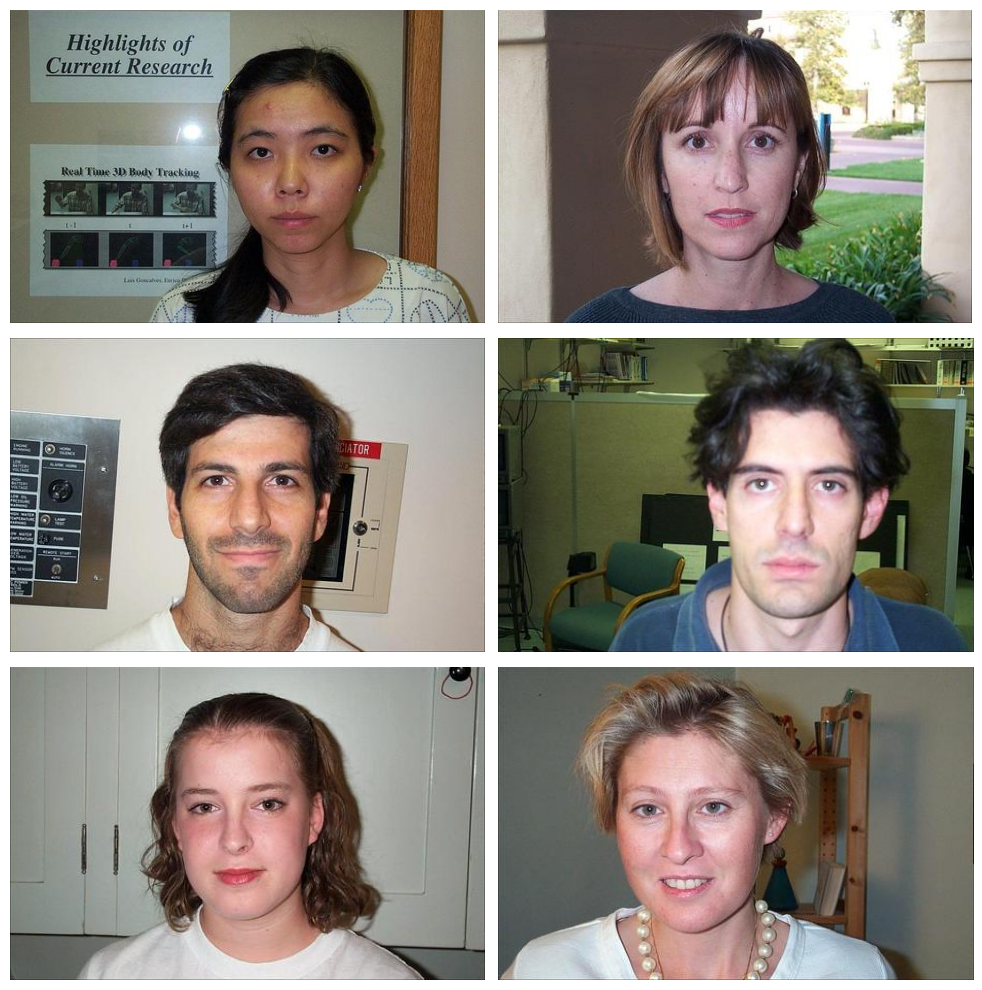

In [81]:
number_images = 435
images,_ = data_loading(path_base="./Faces/", number_images=number_images, reshape = False)
plot_random_images(images, num_images=6)

#### B) Jeu de données de voitures, bicyclettes, motos et personnes : http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1

![Vélo](./samples_dataset_2/bike_002.jpg)

![Personne](./samples_dataset_2/person_001.jpg)



![Voiture](./samples_dataset_2/carsgraz_001.jpg)

![Moto](./samples_dataset_2/0005.jpg)

### III/ Entraînement sur différents jeu de données

#### A) HOG pour la reconnaissance faciale

In [82]:
number_images = 435

images, indexes = data_loading(path_base="./Faces/", number_images=number_images)
hog_images, X = HOG(images, number_images)
Y = labelize_people(number_images)

X = np.concatenate((X[:387], X[392:]))
Y = np.concatenate((Y[:387], Y[392:]))
indexes = np.concatenate((indexes[:387], indexes[392:]))

number_images = 430
Y = Y.reshape(number_images,)

X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, Y, indexes, number_images, train_size = 0.7, test_size = 0.15
)
gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print("Validation Error Rate:", err_val)
print("Test Error Rate:", err_test)

KeyboardInterrupt: 

Le taux d'erreur est important, de 45%. Mais il faut prendre en compte que la taille de notre jeu de données (430 entrées pour 26 classes) est petite. Notre modèle réussit malgré cela à déterminer l'identité d'un sujet parmi 26 identités 55% du temps. La probabilité de choisir la bonne identité parmi 26 au hasard est de 1/26 soit environ 4%. Notre modèle a donc une performance 14 fois plus élévée que le hasard. 

#### B) HOG pour la reconnaissance du sexe d'un individu

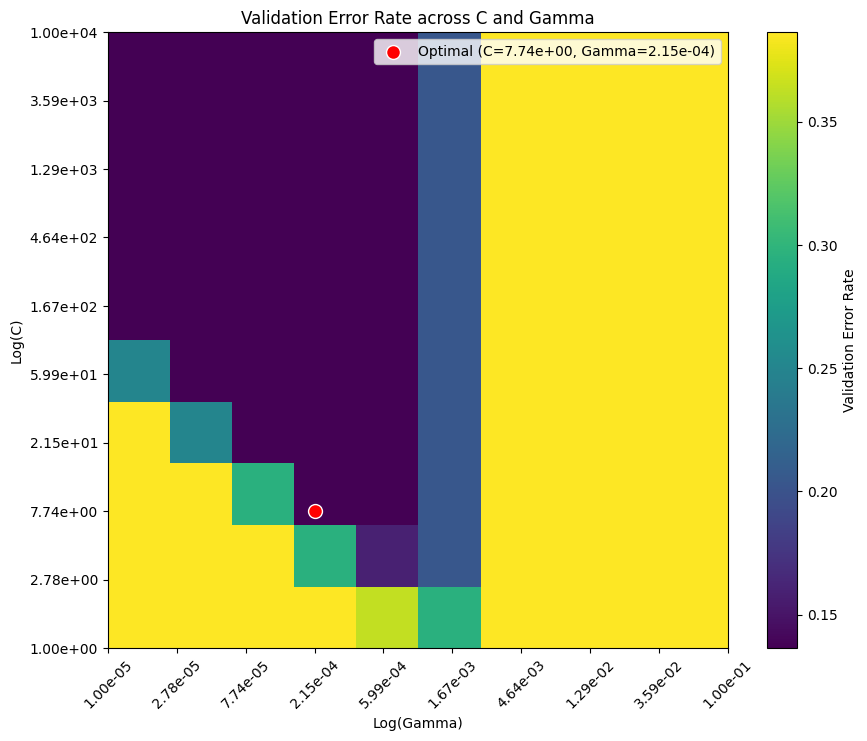

Validation Error Rate: 0.13636363636363635
Test Error Rate: 0.18181818181818177


In [ ]:
number_images = 435

images, indexes = data_loading(path_base="./Faces/", number_images=number_images)
hog_images, X = HOG(images, number_images)
Y = labelize_men_woman(number_images)
X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, Y, indexes, number_images, train_size = 0.7, test_size = 0.15
)
gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print("Validation Error Rate:", err_val)
print("Test Error Rate:", err_test)

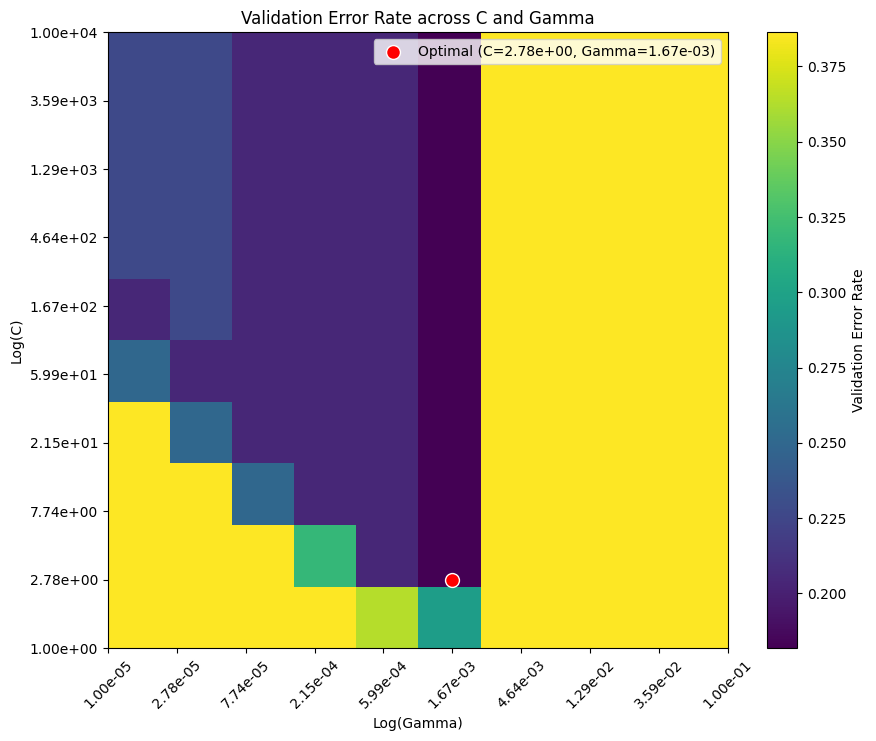

Validation Error Rate: 0.18181818181818177
Test Error Rate: 0.2727272727272727


In [ ]:
number_images = 435

images, indexes = data_loading(path_base="./Faces/", number_images=number_images)
hog_images, X = HOG(images, number_images)
Y = labelize_men_woman(number_images)
X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, Y, indexes, number_images, train_size = 0.6, test_size = 0.2
)
gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print("Validation Error Rate:", err_val)
print("Test Error Rate:", err_test)

On observe que l'erreur de test de nos premiers entraînements pour l'identification du sexe d'un individu est plus élévé que l'erreur de validation : c'est un cas de surapprentissage (ou overfitting). Cela peut être dû à un jeu d'apprentissage trop grand par rapport aux données de validation et de test. 

Ce surapprrentissage n'est cependant pas étonnant avec nos données, en dépit de valeur classiques de séparation du jeu de données (en 0.7/0.15/0.15 puis 0.6/0.2/0.2 respectivement pour apprentissage/validation/test), car en effet plusieurs photos d'une même personne représentant la même classe crée une redondance trop importante dans l'information. 

On tente donc de réduire la taille de l'ensemble d'apprentissage, avec la séparation 0.5/0.25/0.25. 

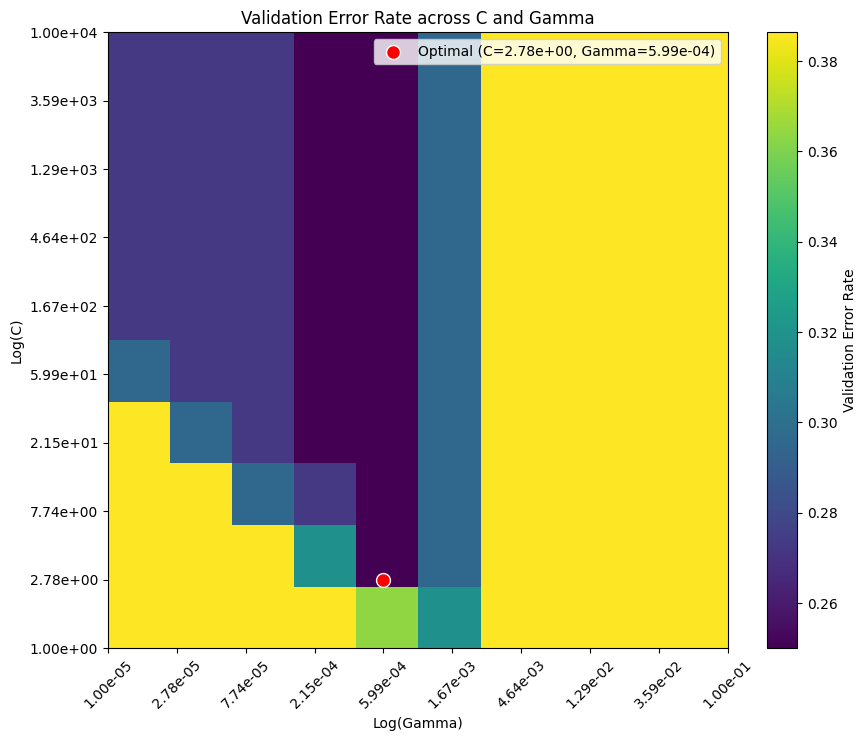

Validation Error Rate: 0.25
Test Error Rate: 0.18181818181818177


In [ ]:
number_images = 435

images, indexes = data_loading(path_base="./Faces/", number_images=number_images)
hog_images, X = HOG(images, number_images)
Y = labelize_men_woman(number_images)
X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, Y, indexes, number_images, train_size = 0.5, test_size = 0.25
)
gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print("Validation Error Rate:", err_val)
print("Test Error Rate:", err_test)

Le taux d'erreur de test a bien diminué, et l'on a plus d'overfitting. Un taux d'erreur de 20% n'est pas utilisable pour une application directe, mais en aggrégant plus de données, ou en apprenant des hyperparamètres supplémentaires (comme la taille de la fenêtre dans HOG par exemple). 

Sachant que l'on a 2 classes, donc que la probabilité de bien classifier une image au hasard est de 1/2, notre modèle est 1.5 fois plus performant que le hasard. 

#### C) HOG pour la reconnaissance d'objets

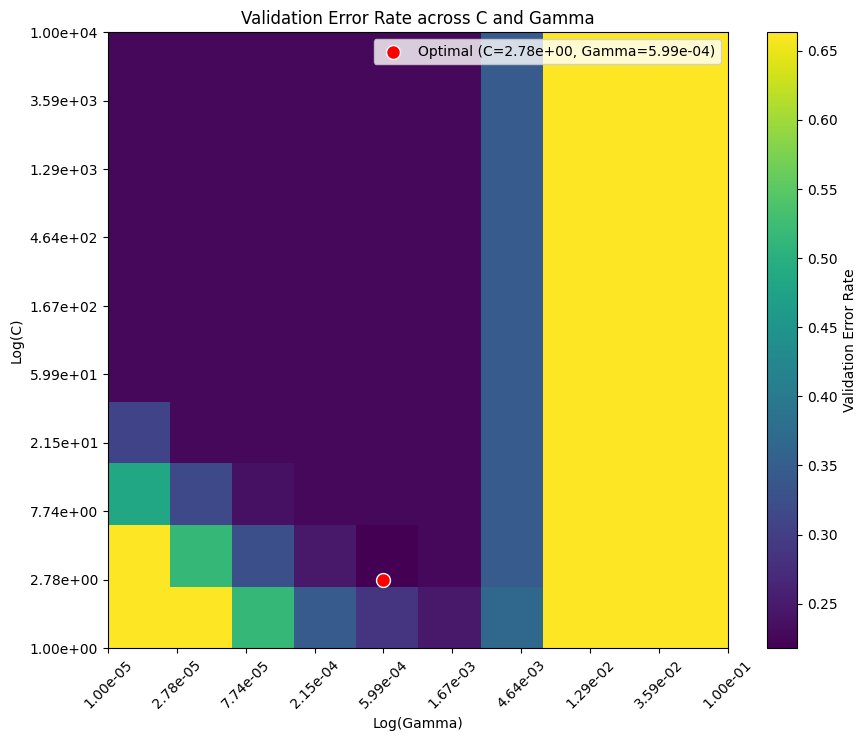

C = 2.7826, Gamma = 0.0006

Erreur de validation : 0.2178
Erreur de test : 0.2178


In [ ]:
base_path = "./dataset" 

images, labels, indexes, label_map = load_dataset_from_folders(base_path, to_gray=True)

number_images = len(images)
hog_images, X = HOG(images, number_images)


X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, X_train_max = data_preprocessing(
    X, labels, indexes, number_images, train_size = 0.6, test_size = 0.2
)

gamma_optimal, c_optimal = crossvalidation(X_train, X_val, Y_train, Y_val)
print(f"C = {c_optimal:.4f}, Gamma = {gamma_optimal:.4f}")


results_train, results_val, results_test, err_val, err_test = learn_optimal_parameters(
    X_train, X_val, X_test, Y_train, Y_val, Y_test, indexes_train, indexes_val, indexes_test, gamma_optimal, c_optimal
)

print(f"\nErreur de validation : {err_val:.4f}")
print(f"Erreur de test : {err_test:.4f}")




L'erreur de test est de 22% pour une classification de 4 classes, correspond à une performance 1.5 plus élevée que le hasard. 

### Conclusion 

Sur des relativement petis jeux de données, nous arrivont à créer des modèles plus performants que le hasard en couplant HOG à un SVM.

L'apprentissage de nos modèles n'est pas directement applicable à une utilisation réelle, mais montre que les méthodes de couplage de HOG, et d'apprentissage automatique sont dignes d'intérêt. 

On pourrait améliorer nos résultats en utilisant divers modèles d'apprentissage automatique, comme les CNN.

# 6. 📊 Analyse

Prenons de la distance et ajoutons du relief. Avantages, limites, concurrents et futur du HOG !

### Avantages

**Robuste aux changements d'éclairage** grâce à la nomalisation des blocs. 

**Invariant aux changements de pose** tant que les variations de pose ou d'angle de vue sont modérés.

**Facilité d'implémentation** avec sa simplicité de mise en oeuvre, il est de plus disponible dans des bibliothèques telle que OpenCV. 

### Limites

**Sensibilité aux changements d'échelle importants**, en effet il n'est invariant qu'à de légers changements d'échelle puisqu'il balaye l'image avec des cellules de différentes tailles mais dans une plage fixée a priori. 

**Vulnérabilité au bruit et transformations complexes** comme des variations de perspectives ou des objets particulièrement déformés.

**Moins performant pour de la détection d'objets complexes ou de haute précision** car repose sur des descripteurs bas niveau. 

### Comparaison des performances avec d'autres méthodes

### À prendre en compte avant toutes comparaisons !

HOG est principalement un **extracteur de caractéristique**, auquel on peut adjoindre différents **classifieurs**. Ici, nous le comparerons à d'autres extracteurs ainsi qu'à des **détecteurs** complets, dans ce second cas ce sera le HOG adjoint d'un SVM linéaire que l'on comparera. 

### Autres extracteurs de caractéristiques

**SIFT (Scale-Invariant Feature Transform)** : 

\+ Invariant aux  changements d'échelle et aux rotations

\- Plus coûteux en termes de calcul, donc moins adaptés pour du temps réel

**SURF (Speeded-Up Robust Features)** : 

\+ Version optimisée de SIFT, plus rapide 

\- ...mais légèrement moins précis

\- Breveté, ce qui limite son utilisation dans certaines applications commerciales. N'est plus disponible sur OpenCV

\- Reste toujours moins rapide que HOG

**ORB (Oriented FAST and Rotated BRIEF)** : 

\+ Alternative non breveté de SURF

\+ Combine la détection rapide des caractéristiques et un descripteur BRIEF amélioré pour une invariance à la rotation

\- Reste toujours moins rapide que HOG

###  Autre détecteur d'objet

**(F)CNN ((Fully) Convolutional Neural Networks)**

_tels que YOLO (You Only Look Once) et SSD (Single Shot Detector)_

\+ Surpassent HOG pour la détection de caractéristiques complexes, meilleure précision

\- Requièrent des ressources de calcul plus élevées

\- Nécessitent des ensembles de données volumineux pour un entraînement efficace

### Benchmark des méthodes 
_pour l'extraction de caractéristiques avec les méthodes HOG, SIFT et ORB d'OpenCV, sur le dataset de visages vu dans la partie application_

| Méthode | Temps moyen (s) | Points clés moyens    |
|---------|-----------------|-----------------------|
| HOG     | 0.0003          | Pas de points clés    |
| SIFT    | 0.0026          | 46.38                |
| ORB     | 0.0013          | 248.57               |

In [ ]:
import cv2
import numpy as np
import time

def benchmark_feature_detectors(images):
    results = {
        'HOG': {'time': []},
        'SIFT': {'time': [], 'keypoints': []},
        'ORB': {'time': [], 'keypoints': []}
    }
    
    # Initialisation des détecteurs
    # HOG
    hog = cv2.HOGDescriptor()
    
    # SIFT
    sift = cv2.SIFT_create()
    
    # ORB
    orb = cv2.ORB_create()
    
    # Boucle sur toutes les images
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # ---- HOG ----
        start_time = time.time()
        hog_features = hog.compute(gray)
        results['HOG']['time'].append(time.time() - start_time)
        
        # ---- SIFT ----
        start_time = time.time()
        keypoints_sift, _ = sift.detectAndCompute(gray, None)
        results['SIFT']['time'].append(time.time() - start_time)
        results['SIFT']['keypoints'].append(len(keypoints_sift))
        
        # ---- ORB ----
        start_time = time.time()
        keypoints_orb, _ = orb.detectAndCompute(gray, None)
        results['ORB']['time'].append(time.time() - start_time)
        results['ORB']['keypoints'].append(len(keypoints_orb))
    
    return results

# Exemple d'utilisation
if __name__ == "__main__":
    # Simulation d'un tableau de 435 images RGB (128, 128)
    np.random.seed(42)
    images = np.random.randint(0, 256, (435, 128, 128, 3), dtype=np.uint8)

    # Exécution du benchmark
    results = benchmark_feature_detectors(images)

    # Affichage des résultats
    for method, data in results.items():
        avg_time = np.mean(data['time'])
        if 'keypoints' in data:
            avg_keypoints = np.mean(data['keypoints'])
            print(f"{method} - Temps moyen: {avg_time:.4f}s, Points clés moyens: {avg_keypoints:.2f}")
        else:
            print(f"{method} - Temps moyen: {avg_time:.4f}s (Pas de points clés)")

HOG - Temps moyen: 0.0004s (Pas de points clés)
SIFT - Temps moyen: 0.0028s, Points clés moyens: 46.38
ORB - Temps moyen: 0.0013s, Points clés moyens: 248.57


### Que conclure de cette partie ?

HOG offre une solution **simple et efficace** pour la détection d'objets dans des scénarios simples et en **temps réel**, les **CNN** sont préférés pour des tâches nécessitant une **précision** plus élevée et une gestion de la complexité visuelle. 

Concrètement, HOG sera une bonne solution pour une implémentation en **aide à la conduite**, permettant une réponse rapide, efficace, et relativement peu coûteuse. Dans un véhicule entièrement autonome cependant, ses performances imparfaites font qu'il ne peut être la **seule** reconnaissance mise en place. Une **solution hybride**, combinant sa rapidité et l'efficacité d'une autre méthode telle que les CNN, serait nécessaire. 

Cela nous amène à la dernière sous-partie de l'analyse...

### Améliorations et Perspectives

### Améliorations

**Combiner avec des modèles d'apprentissage automatique** HOG peut devenir plus précis, par exemple en utilisant un SVM non-linéaire ou un CNN comme classifieur. Résultat plus **précis** qu'avec un HOG, plus **rapide** qu'avec un CNN !

**Utiliser des filtres de débruitage** tels que des filtres Gaussien permet de réduire la sensibilité au bruit du HOG.

**Optimiser les paramètres pour des applications spécifiques**, en changeant la taille des cellules ou le nombre de bins dans l'histogramme par exemple, afin de s'adapter à la situation si celle-ci est connue en avance. 

### Perspectives

_où on voit les portes ouvertes par les améliorations précédentes_

Dans la **surveillance du traffic urbain** son utilisation en pré-traitement pour un CNN permet une accélération nécessaire de celui-ci quand les véhicules défilent à 130km/h.

Pour de la **reconnaissance faciale** on peut penser que la capacité d'adaptation du HOG à diverses luminosité en fait un bon candidat pour reconnaître le visage de l'utilisateur qui veut déverouiller son téléphone en pleine nuit, mais la très faible luminosité peut induire un bruit : l'usage d'un filtre de débruitage en amont permet de profiter des qualités du HOG dans ce domaine.

Dans des applications très spécifiques telle que la **reconnaissance de cellules tumorales**, le fait de connaître les images types attendues permets de paramétrer aux mieux nos différentes plages et les forts changements d'échelles par exemple ne sont plus une limite. 

# ✅ Conclusion 

**HOG** pour **Histogram of Oriented Gradients**

C'est un **descripteur** clé en vision par ordinateur, reconnu pour la détection d'objets comme les piétons. 

Après avoir détaillé son fonctionnement basé sur l'analyse des gradients pour capturer les contours, nous avons examiné ses applications majeures, notamment en surveillance et en **conduite autonome**. 

Bien qu'il présente des limites face aux **changements d'échelle et au bruit**, il reste une solution **rapide et robuste**, particulièrement adaptée aux systèmes à ressources limitées. 

Son intégration avec des modèles modernes (CNN) ouvre la voie à des compromis efficaces entre **performance et complexité**.

# 📚 Références


- Wikipédia. (2024). Histogramme de gradient orienté - Wikipédia, l'encyclopédie libre. Récupéré sur [http://fr.wikipedia.org/w/index.php?title=Histogramme_de_gradient_orient%C3%A9&oldid=219342036](http://fr.wikipedia.org/w/index.php?title=Histogramme_de_gradient_orient%C3%A9&oldid=219342036) (consulté le 10/10/2024).
- Dalal, N., & Triggs, B. (2005). Histograms of oriented gradients for human detection. In *2005 IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR'05)* (Vol. 1, pp. 886-893). https://doi.org/10.1109/CVPR.2005.177
- Suard, F., Rakotomamonjy, A., Bensrhair, A., & Broggi, A. (2006). Pedestrian Detection using Infrared images and Histograms of Oriented Gradients. In *2006 IEEE Intelligent Vehicles Symposium* (pp. 206-212). [http://www.ce.unipr.it/people/broggi/publications/iv2006-pd-aziz.pdf](http://www.ce.unipr.it/people/broggi/publications/iv2006-pd-aziz.pdf). https://doi.org/10.1109/IVS.2006.1689629
- Hafiz Ahamed, Ishraq Alam, Md. Manirul Islam (2018). In *HOG-CNN Based Real Time Face Recognition*. https://www.researchgate.net/profile/Md-Hafiz-Ahamed/publication/330684381_HOG-CNN_Based_Real_Time_Face_Recognition/links/5c531c58299bf12be3f0e777/HOG-CNN-Based-Real-Time-Face-Recognition.pdf